## Análisis de Grupo de WhatsApp 
por Luis Rafael Arce Rivera

#### Importando las Librerias Necesarias

In [53]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

### Función con expresiones regulares para obtener la fecha y hora de cada mensaje
Por medio de expresiones regulares obtendremos la fecha y hora en la que se envió cada mensaje al grupo

In [54]:
def startsWithDateAndTime(s):
    pattern = '^\d{1,2}/\d{1,2}/\d{1,2}, \d{1,2}:\d{1,2}\S [AaPp].\s[Mm]. -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

### Función para obtener el autor de cada mensaje
Usando expresiones regulares podemos obtener desde un nombre sencillo, hasta nombres completos incluso nombres con emojis

In [55]:
def FindAuthor(s):
    patterns = [
        '([\w]+):',                        # Nombre
        '([\w]+[\s]+[\w]+):',              # Nombre + Apellido
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # Nombre + Segundo Nombre + Apellido
        '([\w]+)[\u263a-\U0001f999]+:',    # Nombre con Emoji              
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

### Función para Separar Fecha y Hora del mensaje a columnas individuales

In [56]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    print(dateTime)
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

### Obteneiendo el archivo txt y ejecutando las funciones anteriores para formar Dataframe

In [57]:
parsedData = [] 

conversationPath = './Chat con WhatsApp Familia.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
   
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) 
df["Date"] = pd.to_datetime(df["Date"])

07/08/19, 12:16 p. m.
07/08/19, 3:44 p. m.
08/08/19, 3:50 p. m.
12/08/19, 3:53 p. m.
12/08/19, 3:54 p. m.
12/08/19, 3:54 p. m.
12/08/19, 4:13 p. m.
12/08/19, 7:23 p. m.
12/08/19, 8:13 p. m.
12/08/19, 8:14 p. m.
13/08/19, 12:00 p. m.
13/08/19, 12:06 p. m.
13/08/19, 12:08 p. m.
13/08/19, 1:22 p. m.
14/08/19, 12:54 p. m.
14/08/19, 1:00 p. m.
14/08/19, 1:25 p. m.
14/08/19, 1:26 p. m.
14/08/19, 1:29 p. m.
14/08/19, 1:29 p. m.
14/08/19, 1:29 p. m.
14/08/19, 1:35 p. m.
14/08/19, 2:10 p. m.
14/08/19, 2:10 p. m.
14/08/19, 2:11 p. m.
14/08/19, 4:17 p. m.
14/08/19, 5:49 p. m.
14/08/19, 5:56 p. m.
15/08/19, 9:03 a. m.
15/08/19, 11:20 a. m.
15/08/19, 12:00 p. m.
15/08/19, 12:03 p. m.
15/08/19, 12:03 p. m.
15/08/19, 12:03 p. m.
15/08/19, 12:04 p. m.
15/08/19, 12:04 p. m.
15/08/19, 12:04 p. m.
15/08/19, 12:04 p. m.
15/08/19, 12:04 p. m.
15/08/19, 12:04 p. m.
15/08/19, 12:05 p. m.
15/08/19, 12:05 p. m.
15/08/19, 12:05 p. m.
15/08/19, 12:06 p. m.
15/08/19, 12:06 p. m.
15/08/19, 12:06 p. m.
15/08/19, 12

22/06/20, 2:32 p. m.
22/06/20, 2:32 p. m.
22/06/20, 2:32 p. m.
22/06/20, 4:49 p. m.
22/06/20, 4:49 p. m.
22/06/20, 4:49 p. m.
22/06/20, 4:50 p. m.
22/06/20, 4:50 p. m.
22/06/20, 4:50 p. m.
22/06/20, 4:50 p. m.
22/06/20, 4:50 p. m.
22/06/20, 4:51 p. m.
22/06/20, 4:51 p. m.
22/06/20, 4:52 p. m.
22/06/20, 4:53 p. m.
22/06/20, 4:53 p. m.
22/06/20, 4:53 p. m.
22/06/20, 4:53 p. m.
22/06/20, 5:09 p. m.
22/06/20, 5:09 p. m.
22/06/20, 5:09 p. m.
22/06/20, 5:10 p. m.
22/06/20, 5:10 p. m.
22/06/20, 8:35 p. m.
23/06/20, 9:15 a. m.
23/06/20, 9:16 a. m.
23/06/20, 9:16 a. m.
23/06/20, 9:17 a. m.
23/06/20, 9:17 a. m.
23/06/20, 9:18 a. m.
23/06/20, 9:18 a. m.
23/06/20, 9:19 a. m.
23/06/20, 9:19 a. m.
23/06/20, 9:19 a. m.
23/06/20, 9:20 a. m.
23/06/20, 9:20 a. m.
23/06/20, 9:21 a. m.
23/06/20, 9:22 a. m.
24/06/20, 9:42 a. m.
24/06/20, 9:42 a. m.
24/06/20, 9:42 a. m.
24/06/20, 9:48 a. m.
24/06/20, 9:48 a. m.
24/06/20, 10:01 a. m.
24/06/20, 10:03 a. m.
24/06/20, 10:03 a. m.
24/06/20, 10:05 a. m.
24/06/20,

### Visualizando Dataframe

In [58]:
df.head()

,Date,Time,Author,Message
0,2019-07-08,12:16 p. m.,Denisse Prima Gdj,Jajaj
1,2019-07-08,3:44 p. m.,Denisse Prima Gdj,<Multimedia omitido>
2,2019-08-08,3:50 p. m.,Rafa Arce,<Multimedia omitido>
3,2019-12-08,3:53 p. m.,Rafa Arce,<Multimedia omitido>
4,2019-12-08,3:54 p. m.,Mariano Guanatos,Jajaj triste pero ciertl


### Datos de Dataframe

In [59]:
df.describe()

,Date,Time,Author,Message
count,3320,3320,3320,3320
unique,322,868,4,1841
top,2020-02-01 00:00:00,9:48 a. m.,Rafa Arce,<Multimedia omitido>
freq,85,17,1177,948
first,2019-01-09 00:00:00,NaN,NaN,NaN
last,2020-12-09 00:00:00,NaN,NaN,NaN


### Total de mensajes y total de mensajes multimedia (imagenes, audios, videos)

In [60]:
total_messages = df.shape[0]
print('Mensajes totales ',total_messages)

Mensajes totales  3320


In [61]:
media_messages = df[df['Message'] == '<Multimedia omitido>'].shape[0]
print('Mensajes multimedia', media_messages)

Mensajes multimedia 948


### Tabla y Grafico de Cantidad de Mensajes por Autor

Rafa Arce            1177
Anaid Prima           832
Denisse Prima Gdj     807
Mariano Guanatos      504
Name: Author, dtype: int64


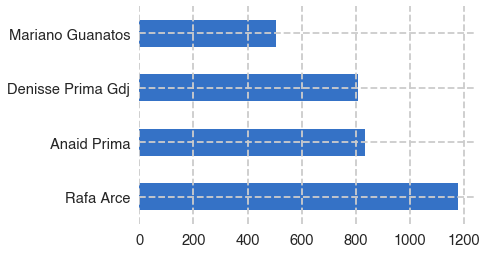

In [62]:
author_value_counts = df['Author'].value_counts()
author_value_counts.plot.barh()
print(author_value_counts)

### Cantidad de mensajes multimedia (imagenes, audios, videos) por autor

Denisse Prima Gdj    408
Rafa Arce            307
Anaid Prima          121
Mariano Guanatos     112
Name: Author, dtype: int64


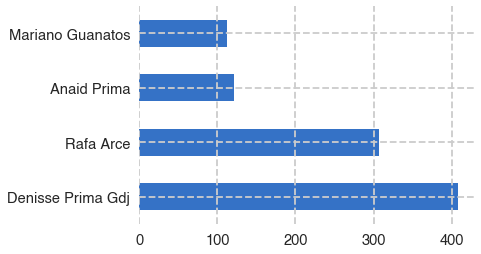

In [63]:
media_mensajes_df = df[df['Message'] == '<Multimedia omitido>']

autor_media_mensajes_conteo = media_mensajes_df['Author'].value_counts()
print(autor_media_mensajes_conteo)
autor_media_mensajes_conteo.plot.barh()

### Gráfico de cantidad de mensajes por mes

In [64]:
date_df = df.groupby("Date").count()
date_df.reset_index(inplace=True)
date_df.head()
fig = px.line(date_df, x="Date", y="Message", title='Number of Messages as time moves on.')
fig.update_xaxes(nticks=20)
fig.show()

### Funcion para detección de emojis en los mensajes

In [65]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)

In [66]:
emojis = sum(df['emoji'].str.len())
print('Cantidad de Emojis', emojis)

Cantidad de Emojis 416


### Detección de cantidad de links compartidos

In [67]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

### Resumén de Mensajes y su tipo

In [68]:
links = np.sum(df.urlcount)

In [70]:
print("Estadistico de Grupo")
print("Mensajes:",total_messages)
print("Mensajes Multimedia:",media_messages)
print("Emojis:",emojis)
print("Links:",links)


Estadistico de Grupo
Mensajes: 3320
Mensajes Multimedia: 948
Emojis: 416
Links: 76


### Cantidad de Palabras y cantidad de letras por mensaje

In [71]:
df['Letter_Count'] = df['Message'].apply(lambda s : len(s))
df['Word_Count'] = df['Message'].apply(lambda s : len(s.split(' ')))

In [72]:
df.head()

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count
0,2019-07-08,12:16 p. m.,Denisse Prima Gdj,Jajaj,[],0,5,1
1,2019-07-08,3:44 p. m.,Denisse Prima Gdj,<Multimedia omitido>,[],0,20,2
2,2019-08-08,3:50 p. m.,Rafa Arce,<Multimedia omitido>,[],0,20,2
3,2019-12-08,3:53 p. m.,Rafa Arce,<Multimedia omitido>,[],0,20,2
4,2019-12-08,3:54 p. m.,Mariano Guanatos,Jajaj triste pero ciertl,[],0,24,4


### Estisticos por autor

In [76]:
l = df.Author.unique()

for i in range(len(l)):
  # Filtrando Mensajes por Autor
  req_df= df[df["Author"] == l[i]]
  # Mensajes de autores en particular
  print(f'Estadisticos de {l[i]} -')
  # Numero de renglones 
  print('Mensajes Enviados', req_df.shape[0])
  #Promedio de palabras por mensaje
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Palabras por mensaje', words_per_message)
  #Mensajes multimedia
  media = media_mensajes_df[media_mensajes_df['Author'] == l[i]].shape[0]
  print('Mensajes Multimedia Enviados', media)
  # Cantidad de Emojis Enviados
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Enviados', emojis)
  #Total de links Enviados
  links = sum(req_df["urlcount"])   
  print('Links Enviados', links)   
  print()

Estadisticos de Denisse Prima Gdj -
Mensajes Enviados 807
Palabras por mensaje 4.059479553903346
Mensajes Multimedia Enviados 408
Emojis Enviados 100
Links Enviados 18

Estadisticos de Rafa Arce -
Mensajes Enviados 1177
Palabras por mensaje 3.4536958368734068
Mensajes Multimedia Enviados 307
Emojis Enviados 262
Links Enviados 30

Estadisticos de Mariano Guanatos -
Mensajes Enviados 504
Palabras por mensaje 2.865079365079365
Mensajes Multimedia Enviados 112
Emojis Enviados 1
Links Enviados 1

Estadisticos de Anaid Prima -
Mensajes Enviados 832
Palabras por mensaje 3.6045673076923075
Mensajes Multimedia Enviados 121
Emojis Enviados 53
Links Enviados 27



### Cantidad de Emojis diferentes utilizados

In [79]:
total_emojis_list = list(set([a for b in df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print('Emojis Diferentes Utilizados', total_emojis)

Emojis Diferentes Utilizados 47


### Tabla de Emojis

In [80]:
total_emojis_list = list([a for b in df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)

emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,🤣,124
1,😂,84
2,😭,30
3,😡,25
4,👀,20
5,🤔,11
6,😍,11
7,😱,9
8,🤤,9
9,👊,7


### Distribución de Emojis

In [82]:
fig = px.pie(emoji_df, values='count', names='emoji',
             title='Gráfico de Distribución de Emojis')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Distribución de Emojis Por Autor

In [85]:
l = df.Author.unique()
for i in range(len(l)):
  dummy_df = df[df['Author'] == l[i]]
  total_emojis_list = list([a for b in dummy_df.emoji for a in b])
  emoji_dict = dict(Counter(total_emojis_list))
  emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
  print('Distribución de Emojis por', l[i])
  author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
  fig = px.pie(author_emoji_df, values='count', names='emoji')
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

Distribución de Emojis por Denisse Prima Gdj


Distribución de Emojis por Rafa Arce


Distribución de Emojis por Mariano Guanatos


Distribución de Emojis por Anaid Prima


### Cantidad Total de Palabras en los Mensajes

In [87]:
text = " ".join(review for review in df.Message)
print ("Tenemos un total de {} palabras en todos los mensajes.".format(len(text)))

Tenemos un total de 77813 palabras en todos los mensajes.


### Nube de Palabras

In [93]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [97]:
text = " ".join(review for review in df.Message)

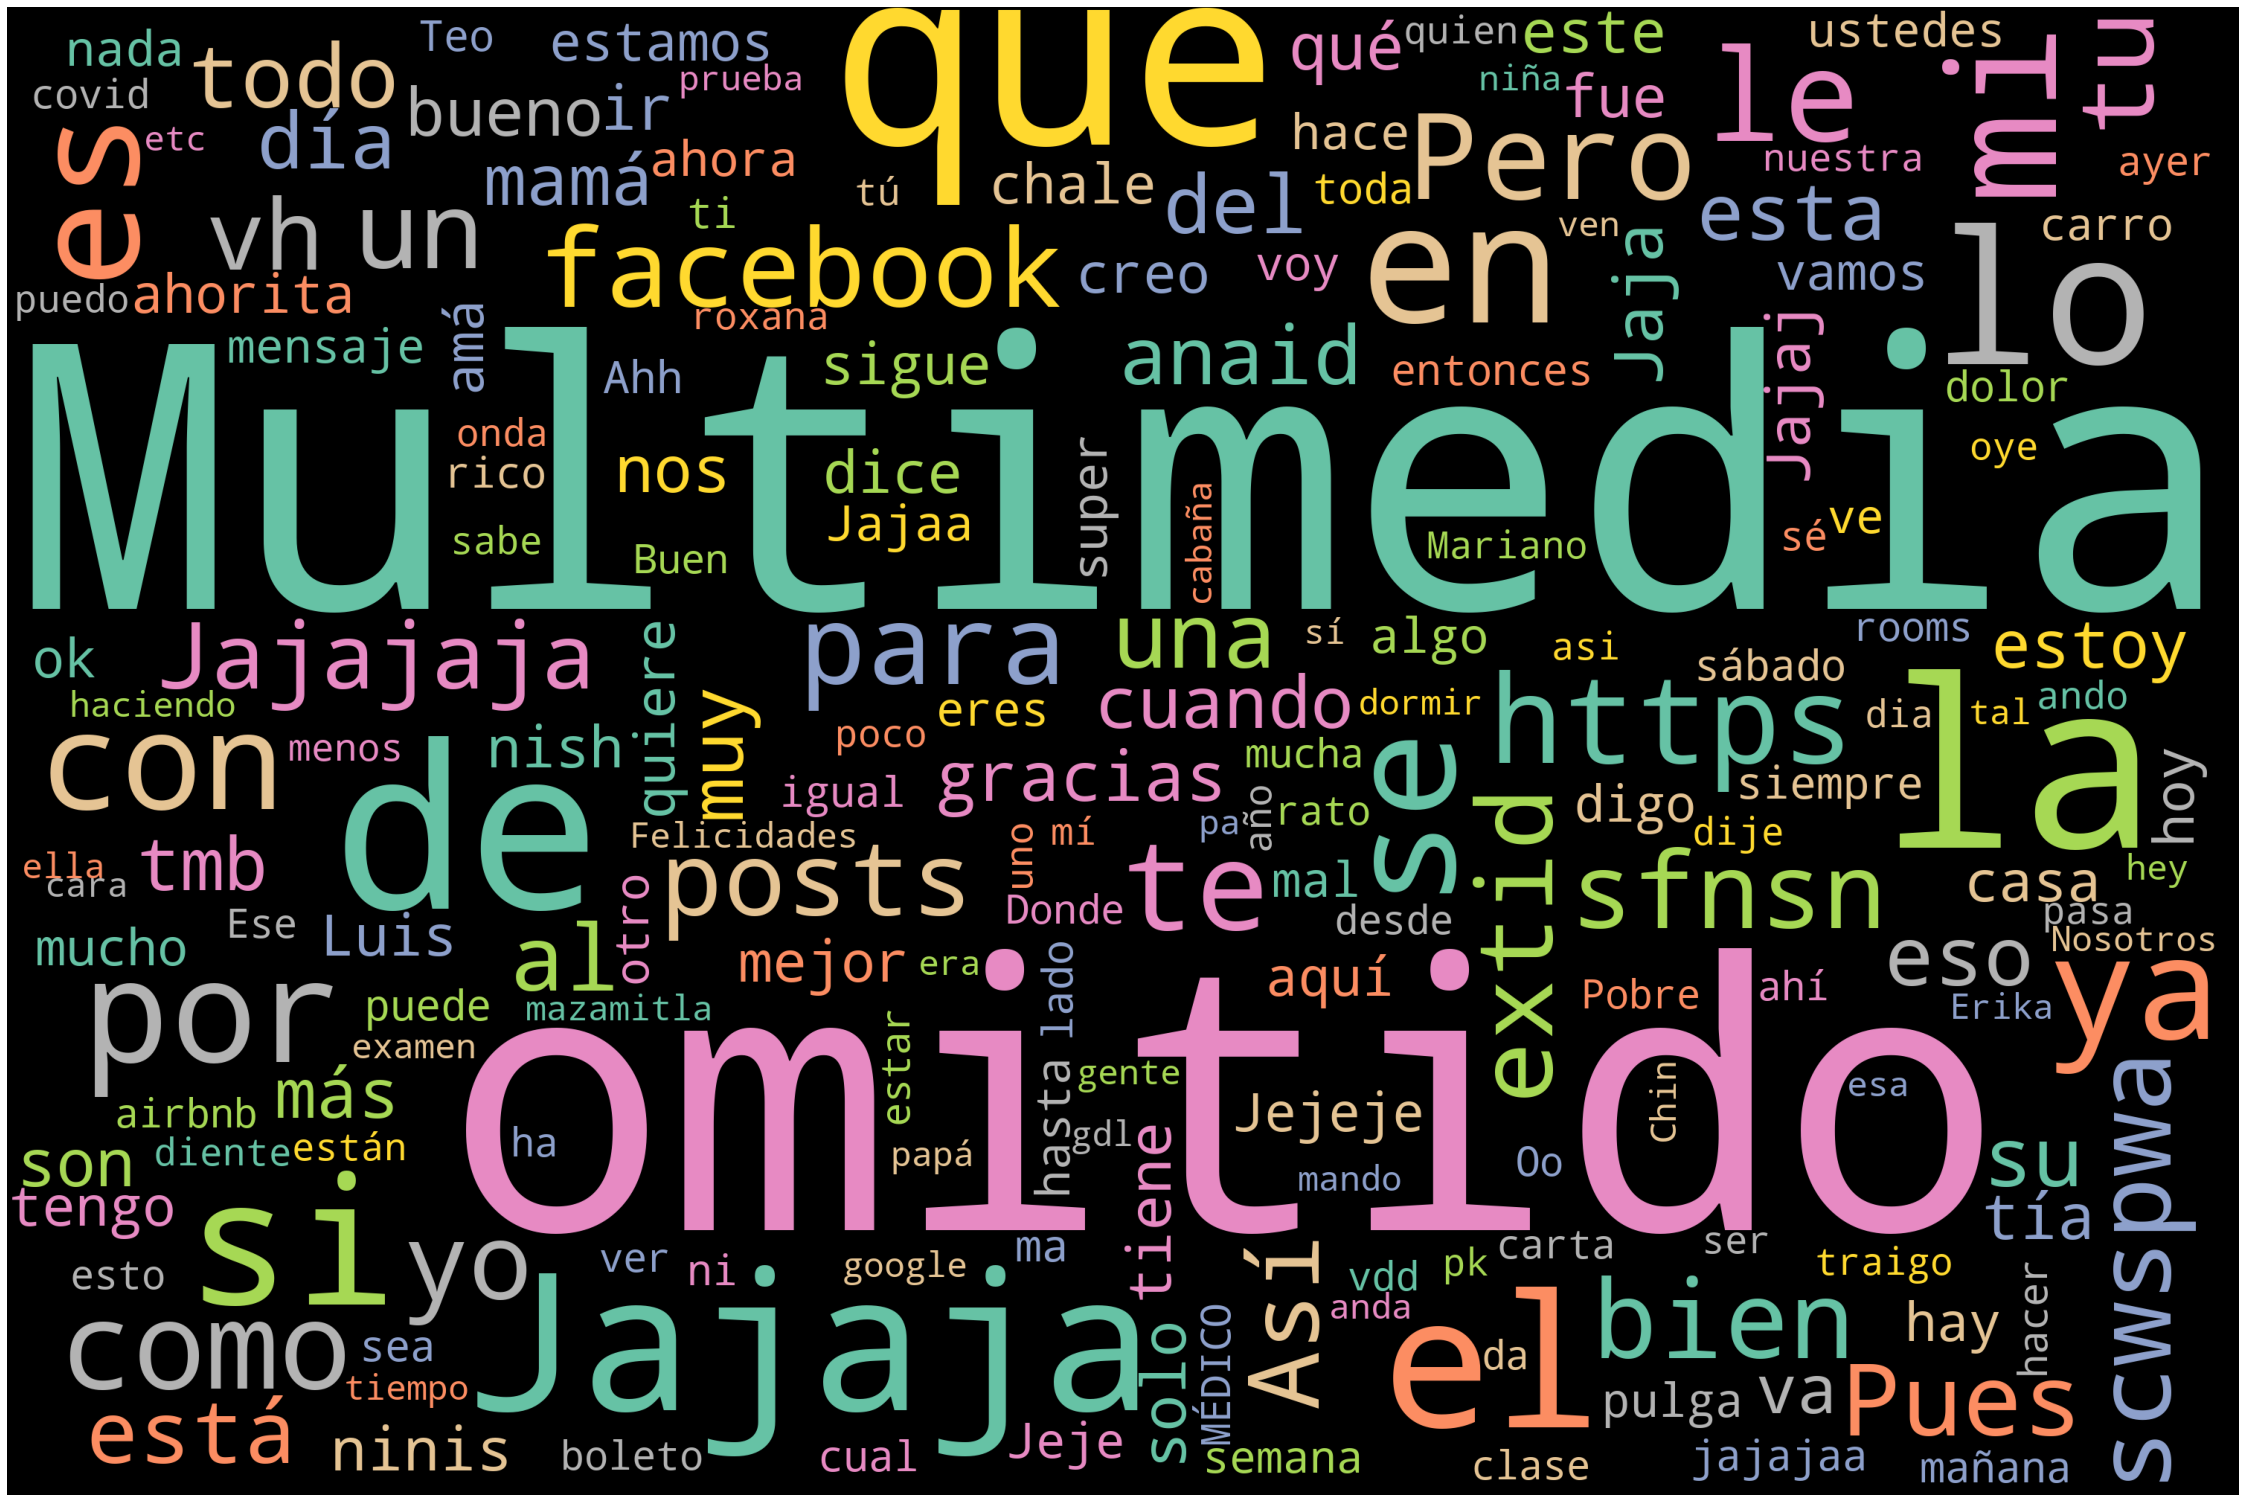

In [98]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

### Distribución de Mensajes por dia de la semana

In [101]:
def f(i):
  l = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Sunday"]
  return l[i];
day_df=pd.DataFrame(df["Message"])
day_df['day_of_date'] = df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(f)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

In [102]:
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False
)
fig.show()

### Fecha con mayor cantidad de mensajes

Text(0, 0.5, 'Date')

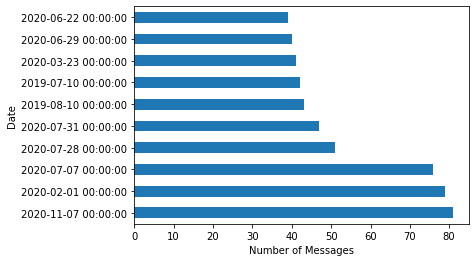

In [143]:
messages_df['Date'].value_counts().head(10).plot.barh()
plt.xlabel('Cantidad de Mensajes')
plt.ylabel('Fecha')
